In [ ]:
# 코랩에 압축파일풀고 이미지조회하기
1.압축파일 업로드
2. 압축파일을 메모리에 풀기 => 파일 입출력이 colab이 너무 늦다


In [1]:
# 마운트하면 올라옴
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 
drive_path = "/content/drive/Mydrive/"
source_filename = drive_path + "dataset/archive.zip"
# 저장경로
extract_folder = "dataset/"
# 압축해제
import shutil
shutil.unpack_archive(source_filename, extract_folder)

ReadError: ignored

In [3]:
# 저장위치
train_dir = extract_folder + "train_set"
test_dir = extract_folder + "test_set"
print(train_dir)

dataset/train_set


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pylab as plt

In [6]:
# rescale로 정규화
image_gen = ImageDataGenerator(rescale=(1/255.))

In [7]:
# flow_from_directory 함수 :폴더에서 이미지 가져와서 제네레이터 객체로 정리
# batch_size = 32 : 32개의 이미지를 로드
# target_size : 
# 
# seed : 랜덤 seed
train_gen = image_gen.flow_from_directory(train_dir,
                                          batch_size = 32,
                                          target_size = (224, 224,),
                                          classes=['cats', 'dogs'],
                                          class_mode = 'binary',
                                          seed = 2020)
test_gen = image_gen.flow_from_directory(test_dir,
                                          batch_size = 32,
                                          target_size = (224, 224,),
                                          classes=['cats', 'dogs'],
                                          class_mode = 'binary',
                                          seed = 2020)


Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


[]


IndexError: ignored

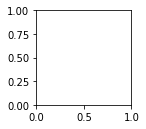

In [8]:
# 샘플 이미지 출력
class_labels = ['cats', 'dogs']
batch = next(train_gen)
images, labels = batch[0], batch[1] # 0번 이미지데이터 1번 레이블
print(labels[:10])
plt.figure(figsize=(16,8))
for i in range(32) :
    ax = plt.subplot(4,8,i+1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(np.int)])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
파일 - 다운로드 - .ipynb 주피터노트북